# Data Preparation for Oakland Police Project

Raw data can be obtained from https://data.oaklandca.gov/. Use search word such as "use of force" and "staff" to obtain related data. Data can be downloaded from the website via csv download option. API also exists but require different set up.

This workbook is to consolidate and clean up dataset for exploratory analysis.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Reading data directly downloaded from web

In [2]:
uof_hist = pd.read_csv('./data/opd_use_of_force_2012-2017.csv')
uof_hist.columns = ['year', 'lv_1', 'lv_2', 'lv_3', 'lv_4']

In [3]:
uof_hist.head(6)

,year,lv_1,lv_2,lv_3,lv_4
0,2012,8,43,71,1124
1,2013,5,30,63,738
2,2014,1,9,43,557
3,2015,11,12,39,443
4,2016,0,30,47,337
5,2017,2,18,74,223


#### data prior to 2012 only exist in pdf picture, use WebPlotDigitizer (https://apps.automeris.io/wpd/)to obtain estimates

In [4]:
lv_1 = pd.read_csv('./data/level_1_uof.csv')
lv_2 = pd.read_csv('./data/level_2_uof.csv')
lv_3 = pd.read_csv('./data/level_3_uof.csv')
lv_4 = pd.read_csv('./data/level_4_uof.csv')

In [5]:
df_join = lv_1.merge(lv_2, on='year', how='left')
df_join = df_join.merge(lv_3, on='year', how='left')
df_join = df_join.merge(lv_4, on='year', how='left')
df_join

,year,lv_1,lv_2,lv_3,lv_4
0,2000,8,NaN,NaN,NaN
1,2001,8,NaN,NaN,NaN
2,2002,10,NaN,NaN,NaN
3,2003,2,NaN,NaN,NaN
4,2004,7,NaN,NaN,NaN
5,2005,7,NaN,NaN,NaN
6,2006,7,NaN,NaN,NaN
7,2007,11,170.0,206.0,1492.0
8,2008,10,98.0,148.0,1913.0
9,2009,6,75.0,164.0,1932.0


In [6]:
data_pre_2012 = df_join.query('year < 2012')

In [7]:
uof_hist = pd.concat([uof_hist, data_pre_2012], axis=0)
uof_hist = uof_hist.sort_values(by='year')

In [8]:
uof_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    18 non-null     int64  
 1   lv_1    18 non-null     int64  
 2   lv_2    11 non-null     float64
 3   lv_3    11 non-null     float64
 4   lv_4    11 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 864.0 bytes


In [9]:
uof_hist['year'] = pd.to_datetime(uof_hist.year, format='%Y')

In [10]:
melt_uof = pd.melt(uof_hist, var_name='level', value_vars=[
                   'lv_1', 'lv_2', 'lv_3', 'lv_4'], id_vars='year')

In [11]:
melt_uof.tail(10)

,year,level,value
62,2008-01-01,lv_4,1913.0
63,2009-01-01,lv_4,1932.0
64,2010-01-01,lv_4,1770.0
65,2011-01-01,lv_4,1346.0
66,2012-01-01,lv_4,1124.0
67,2013-01-01,lv_4,738.0
68,2014-01-01,lv_4,557.0
69,2015-01-01,lv_4,443.0
70,2016-01-01,lv_4,337.0
71,2017-01-01,lv_4,223.0


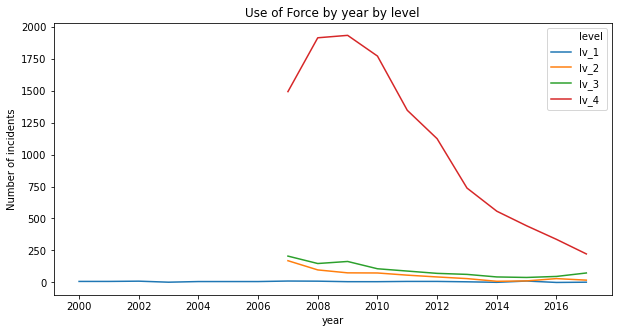

In [12]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='value', hue='level', data=melt_uof)
plt.title('Use of Force by year by level')
plt.ylabel('Number of incidents')
plt.show()

In [13]:
melt_uof.to_csv('./data/uof_edited.csv', index=False)

### Deep dive with 2017 data

In [14]:
# use of force, as well as staffing represntation details, only have 2017

uof_2017 = pd.read_csv('./data/use_of_force_by_ethnic_2017.csv')
uof_2017.head(6)

,Race/Ethnicity,Number of use of force subjects,Population of Oakland,"Rate per 100,000 people in Oakland",Year
0,African American,237,96981,244.4,2017
1,Asian,10,67535,14.8,2017
2,Latino,77,109762,70.2,2017
3,White,12,116230,10.3,2017
4,Citywide,353,419987,84.1,2017


In [15]:
staff_2017 = pd.read_csv('./data/staffing_rep_2017.csv')
staff_2017.head(6)

,Race/Ethnicity,Number of Sworn Staff,Population of Oakland,"Rate of Sworn Staff per 100,000 people in Oakland",Year
0,African American,126,96981,129.9,2017
1,Asian,97,67535,143.6,2017
2,Latino,181,109762,164.9,2017
3,White,286,116230,246.1,2017
4,Citywide,733,419987,174.5,2017


In [16]:
stop_2017 = pd.read_csv(
    './data/stops_by_ethnic_2017.tsv', sep='\t', header=0)
stop_2017.head(6)

,Race/Ethnicity,Number of 2017 Stops,Population of Oakland,"Rate per 1,000 people in Oakland",Year
0,African American,19185,96981,197.8,2017
1,Asian,1553,67535,23.0,2017
2,Latino,6855,109762,62.5,2017
3,White,2805,116230,24.1,2017
4,Citywide,31528,419987,75.1,2017


In [17]:
attr_2017 = pd.read_csv('./data/attrition_2017.csv')
attr_2017.head(6)

,Race/Ethnicity,Began Academy,Completed Academy,Did Not Complete Academy,Attrition Rate,Year
0,African American,62,28,34,54.8,2017
1,Asian,55,33,22,40.0,2017
2,Latino,89,58,31,34.8,2017
3,White,85,53,32,37.6,2017
4,Other,23,22,1,4.3,2017
5,Total,314,194,120,38.2,2017


In [18]:
attr_field_2017 = pd.read_csv('./data/attrition_field_2017.csv')
attr_field_2017.head(6)

,Race/Ethnicity,Began Field Training,Completed Field Training,Did Not Complete Field Training,Attrition Rate,Year
0,African American,26,22,4,15.4,2017
1,Asian,44,35,9,20.5,2017
2,Latino,44,35,9,20.5,2017
3,White,50,46,4,8.0,2017
4,Other,19,15,4,21.1,2017
5,Total,183,153,30,16.4,2017


### Consolidating 2017 data into one table

In [19]:
attr_2017.columns

Index(['Race/Ethnicity', 'Began Academy', 'Completed Academy',
       'Did Not Complete Academy', 'Attrition Rate', 'Year'],
      dtype='object')

In [20]:
attr_field_2017.columns

Index(['Race/Ethnicity', 'Began Field Training', 'Completed Field Training',
       'Did Not Complete Field Training', 'Attrition Rate', 'Year'],
      dtype='object')

In [21]:
ethnic_df = pd.merge(uof_2017[['Race/Ethnicity', 'Number of use of force subjects']], staff_2017[[
                     'Race/Ethnicity', 'Number of Sworn Staff', 'Population of Oakland']], on='Race/Ethnicity')
ethnic_df = ethnic_df.merge(
    stop_2017[['Race/Ethnicity', 'Number of 2017 Stops']], on='Race/Ethnicity')
ethnic_df = ethnic_df.merge(attr_2017.merge(
    attr_field_2017, on='Race/Ethnicity'), on='Race/Ethnicity', how='left')
ethnic_df = ethnic_df.drop(
    ['Attrition Rate_x', 'Year_x', 'Attrition Rate_y', 'Year_y'], axis=1)

In [22]:
col_rename = ['ethnicity', 'uof_num', 'sworn_in', 'population',
              'stop_num', 'start_academy', 'end_academy', 'incomplete_academy',
             'start_field', 'end_field', 'incomplete_field']

In [23]:
final_df = ethnic_df.copy()
final_df.columns = col_rename
final_df.head()

,ethnicity,uof_num,sworn_in,population,stop_num,start_academy,end_academy,incomplete_academy,start_field,end_field,incomplete_field
0,African American,237,126,96981,19185,62.0,28.0,34.0,26.0,22.0,4.0
1,Asian,10,97,67535,1553,55.0,33.0,22.0,44.0,35.0,9.0
2,Latino,77,181,109762,6855,89.0,58.0,31.0,44.0,35.0,9.0
3,White,12,286,116230,2805,85.0,53.0,32.0,50.0,46.0,4.0
4,Citywide,353,733,419987,31528,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
final_df['uof_rate'] = final_df['uof_num']/final_df['population'] * 1000
final_df['stop_rate'] = final_df['stop_num']/final_df['population'] * 1000
final_df['staff_rate'] = final_df['sworn_in']/final_df['population'] * 1000

In [25]:
rate_df = final_df[['ethnicity','uof_rate', 'stop_rate', 'staff_rate']]

In [26]:
rate_df

,ethnicity,uof_rate,stop_rate,staff_rate
0,African American,2.443778,197.822254,1.299224
1,Asian,0.148071,22.995484,1.436292
2,Latino,0.701518,62.453308,1.649022
3,White,0.103244,24.133184,2.460638
4,Citywide,0.840502,75.068990,1.745292


In [27]:
final_df.to_csv('./data/ethnic_details_2017.csv', index=False)
rate_df.to_csv('./data/ratio_info_2017.csv', index=False)